In [1]:
import pandas as pd
import numpy as np

from scipy.stats import linregress

from matplotlib import pyplot as plt
import matplotlib.patches as mpl_patches
%matplotlib inline

In [2]:
data1 = pd.read_csv('../../merge/data_with_features.txt', sep='\t')
data2 = pd.read_csv('../../../../DHS_sites/merge/data_with_features.txt', sep='\t')

data = data1.append(data2)

In [3]:
# stats = pd.read_csv('../statistical_tests/tfx_correlation_statistics.txt', sep='\t')

In [4]:
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

191 2 2
191 2 2
191 2 2
191 2 2


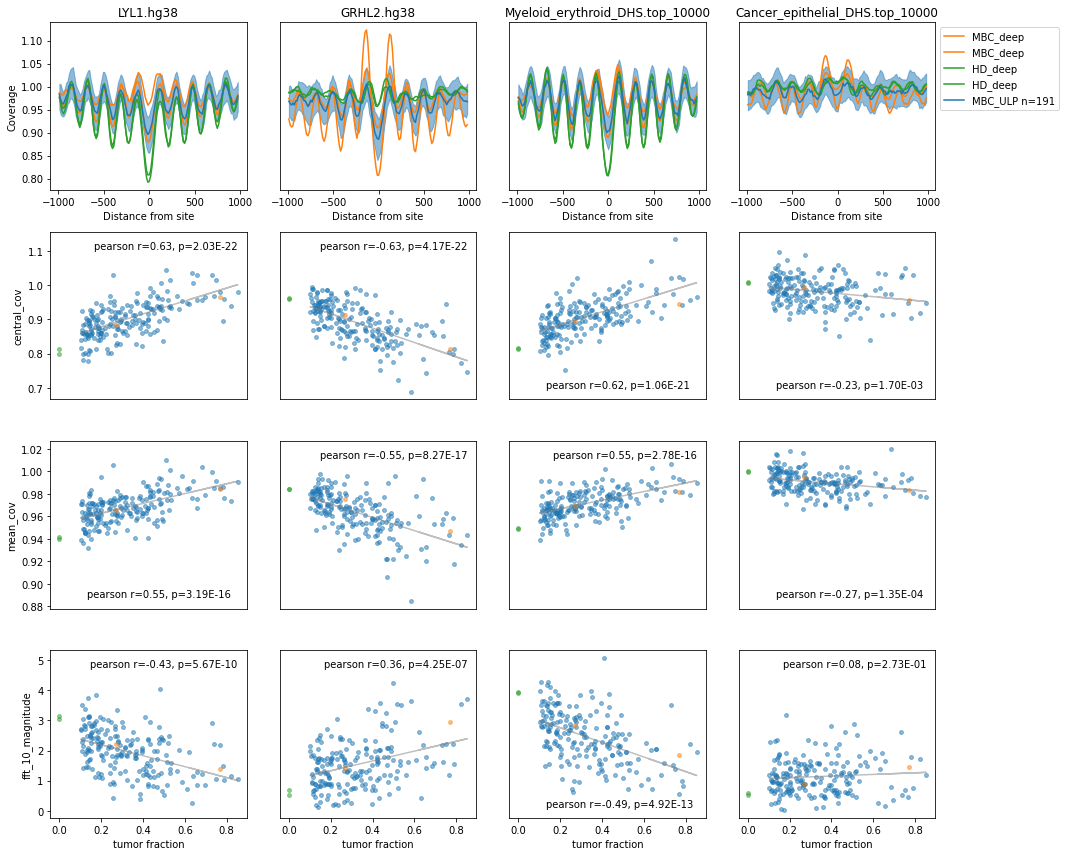

In [5]:
fig,axes = plt.subplots(4,4, figsize = (15,12), sharey = 'row')

for i,site_name in enumerate(['LYL1.hg38','GRHL2.hg38','Myeloid_erythroid_DHS.top_10000','Cancer_epithelial_DHS.top_10000']):
    current_ULP = data[(data['site_name']==site_name) & (data['sample'].str.contains('ULP'))]
    current_ULP = current_ULP[(current_ULP['tumor_fraction']>=0.1) & (current_ULP['ulp_wgs_coverage']>=0.1) & (current_ULP['merged_updated_ER_status_binary']!='none')]
    MBC_deep = data[(data['site_name']==site_name) & (data['sample'].str.contains('deep'))]
    HD_deep = data[(data['site_name']==site_name) & (data['sample'].str.contains('HD'))]
    print(len(current_ULP),len(HD_deep),len(MBC_deep))
    axes[0,i].plot(plot_columns,MBC_deep[str_plot_columns].T, color = 'tab:orange', label = 'MBC_deep')
    axes[0,i].plot(plot_columns,HD_deep[str_plot_columns].T, color = 'tab:green', label = 'HD_deep')
    axes[0,i].plot(plot_columns,current_ULP[str_plot_columns].median(), color = 'tab:blue', label = 'MBC_ULP n='+str(len(current_ULP)))
    axes[0,i].fill_between(plot_columns,np.percentile(current_ULP[str_plot_columns], 25, axis=0),np.percentile(current_ULP[str_plot_columns], 75, axis=0), color = 'tab:blue', alpha = 0.5)

    axes[0,i].set_xlabel('Distance from site')
    
    axes[0,i].set_title(site_name)
    axes[0,i].tick_params(labelleft = False, left=False)
    axes[0,0].set_ylabel('Coverage')
    axes[0,0].tick_params(labelleft = True, left=True)
    
    for j,feature in enumerate(['central_cov','mean_cov', 'fft_10_magnitude']):
        axes[j+1,i].scatter(current_ULP['tumor_fraction'],current_ULP[feature], color = 'tab:blue', alpha = 0.5, s = 15)        
        axes[j+1,i].scatter(MBC_deep['tumor_fraction'],MBC_deep[feature], color = 'tab:orange', alpha = 0.5, s = 15)
        axes[j+1,i].scatter(HD_deep['tumor_fraction'],HD_deep[feature], color = 'tab:green', alpha = 0.5, s = 15)
        slope,intercept,rval,pval,stderr = linregress(current_ULP['tumor_fraction'],current_ULP[feature])
        best_fit = intercept+slope*current_ULP['tumor_fraction']
        
        #add the stat text
        handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
        labels = ['pearson r='+str(np.round(rval,2))+', p='+'{:.2E}'.format(pval)]
        axes[j+1,i].legend(handles,labels, frameon=False)

        
        axes[j+1,i].plot(current_ULP['tumor_fraction'],best_fit, color = 'grey', alpha = 0.5)

        axes[j+1,i].tick_params(labelleft = False, left=False, labelbottom = False, bottom=False)
        
        axes[j+1,0].set_ylabel(feature)        
        axes[j+1,0].tick_params(labelleft = True, left=True)
        
    axes[3,i].set_xlabel('tumor fraction')
    axes[3,i].tick_params(labelbottom = True, bottom=True)
    
axes[0,3].legend(bbox_to_anchor = [1,1], loc='upper left')

fig.tight_layout()
fig.savefig('features_vs_tfx.pdf')

In [6]:
#sanity check, these should match
stat_data = pd.read_csv('../statistical_tests/tfx_correlation_statistics.txt',sep='\t')
print(stat_data.set_index('site_name')['pearson_r_central_cov_GC_corrected']['LYL1.hg38'])
print(stat_data.set_index('site_name')['pearson_r_mean_cov_GC_corrected']['LYL1.hg38'])
print(stat_data.set_index('site_name')['pearson_r_fft_10_magnitude_GC_corrected']['LYL1.hg38'])
print('\n')
print(stat_data.set_index('site_name')['pearson_r_central_cov_GC_corrected']['GRHL2.hg38'])
print(stat_data.set_index('site_name')['pearson_r_mean_cov_GC_corrected']['GRHL2.hg38'])
print(stat_data.set_index('site_name')['pearson_r_fft_10_magnitude_GC_corrected']['GRHL2.hg38'])

0.6288328151875361
0.545836888567678
-0.4294554000344432


-0.6251787102599259
-0.5547716074312028
0.3561985424690875
